##Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##Exploratory Data Analysis

**Dataset Description: Bank Customer Details**

Overview

This dataset encompasses detailed information about the customers of a bank, facilitating analysis on customer retention and behavior patterns, especially focusing on those who have exited the bank's services.

Attributes Description

- **RowNumber**: Sequential number serving as an identifier for rows in the dataset.
- **CustomerId**: Unique identifier for each customer.
- **Surname**: Last name of the customer.
- **CreditScore**: A score assigned to a customer based on their credit history.
- **Geography**: The country where the customer resides.
- **Gender**: The gender of the customer (Male/Female).
- **Age**: The age of the customer.
- **Tenure**: The number of years the customer has been with the bank.
- **Balance**: The current balance in the customer’s bank account.
- **NumOfProducts**: The number of products that the customer has with the bank.
- **HasCrCard**: Indicates whether the customer has a credit card with the bank (1 = Yes, 0 = No).
- **IsActiveMember**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **EstimatedSalary**: The estimated salary of the customer.
- **Exited**: Indicates whether the customer has left the bank (1 = Yes, 0 = No).


In [ ]:
# Reading the Data from the train file
dta_train = pd.read_csv('Churn_Modelling.csv')
print(dta_train.shape)
dta_train.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Analyzing Data Using Graphs

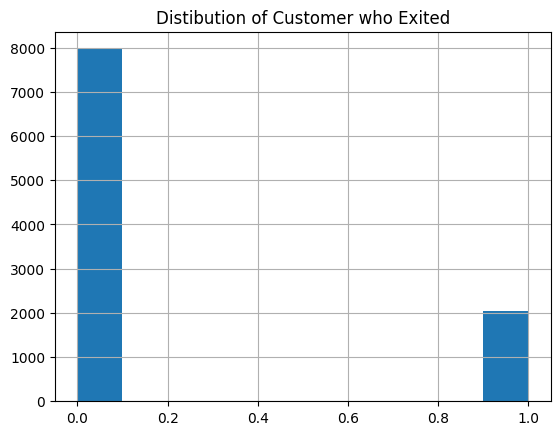

In [ ]:
dta_train["Exited"].hist()
plt.title('Distibution of Customer who Exited')
plt.show()

Of the total, 8000 customers did not exit and 2000 exited.

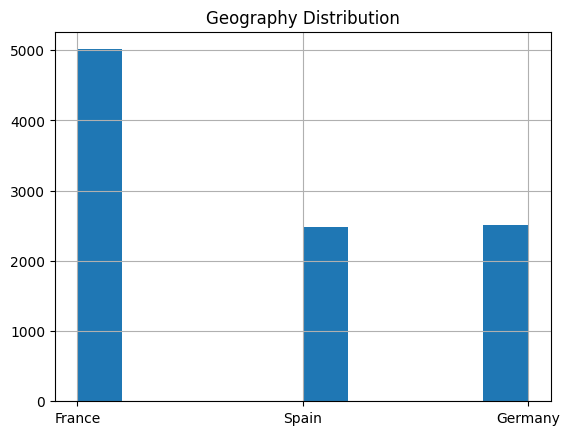

In [ ]:
dta_train["Geography"].hist()
plt.title('Geography Distribution')
plt.show()

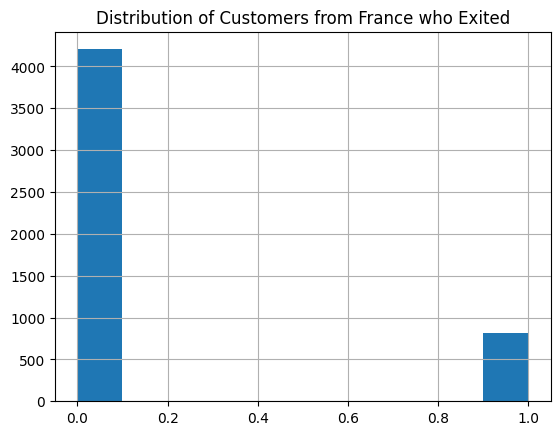

In [ ]:
dta_train["Exited"][dta_train["Geography"]=="France"].hist()
plt.title('Distribution of Customers from France who Exited')
plt.show()

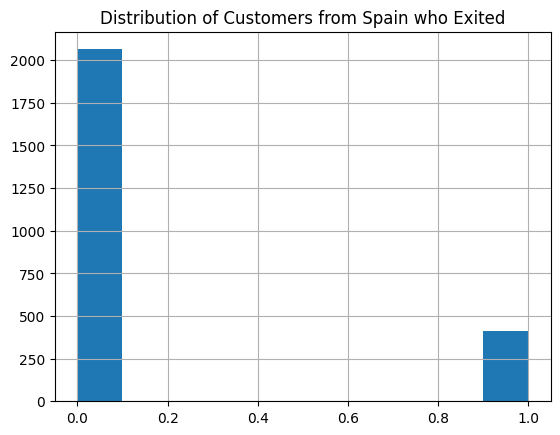

In [ ]:
dta_train["Exited"][dta_train["Geography"]=="Spain"].hist()
plt.title('Distribution of Customers from Spain who Exited')
plt.show()

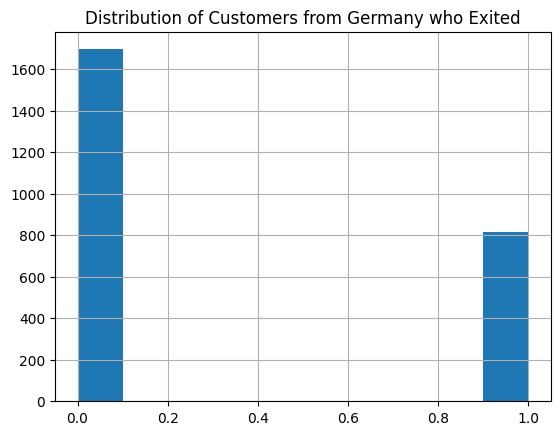

In [ ]:
dta_train["Exited"][dta_train["Geography"]=="Germany"].hist()
plt.title('Distribution of Customers from Germany who Exited')
plt.show()

**France** has the highest total number of customers among the three geographies and also the highest number of non-exitors. However, its number of exits, while substantial, is less than Germany's on a proportional basis.

**Germany**, despite having fewer customers than France, has almost the same number of customers who exited. This indicates a higher churn rate in Germany compared to France.

**Spain** shows the lowest numbers both in terms of total customers and the number of exits, which suggests a lower overall churn rate compared to Germany and France but needs to be analyzed in proportion to the total customer base to confirm.

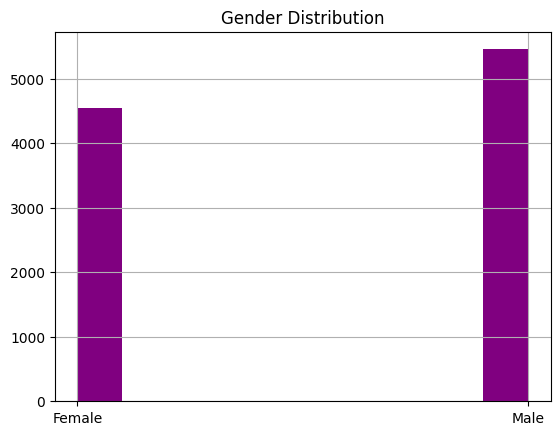

In [ ]:
dta_train["Gender"].hist(color="purple")
plt.title('Gender Distribution')
plt.show()

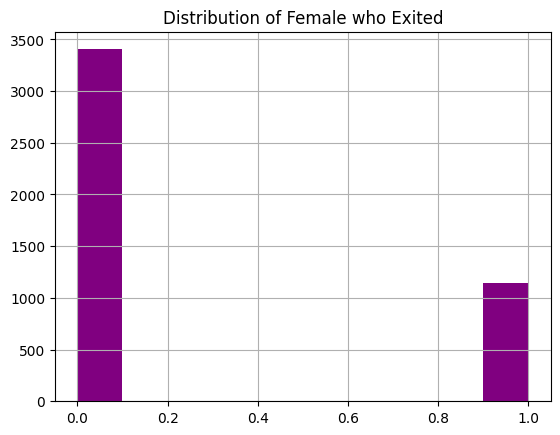

In [ ]:
dta_train["Exited"][dta_train["Gender"]=="Female"].hist(color="purple")
plt.title('Distribution of Female who Exited')
plt.show()

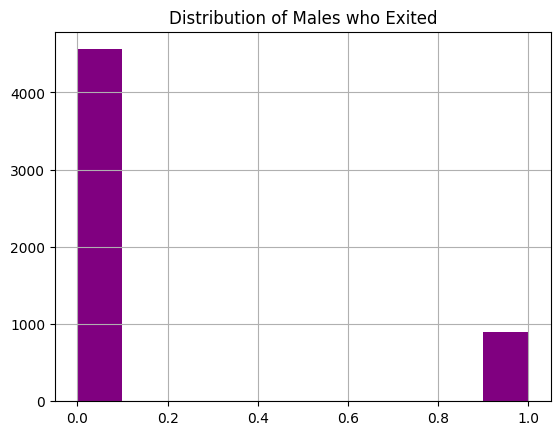

In [ ]:
dta_train["Exited"][dta_train["Gender"]=="Male"].hist(color="purple")
plt.title('Distribution of Males who Exited')
plt.show()

**Males** have a higher total number of individuals who have not exited compared to females. They also have a lower number of exits, suggesting a lower churn rate among males compared to females.

**Females** show a higher exit number compared to males, indicating a higher churn rate among females. The ratio of exited to non-exited females is also noticeably higher than that of males.

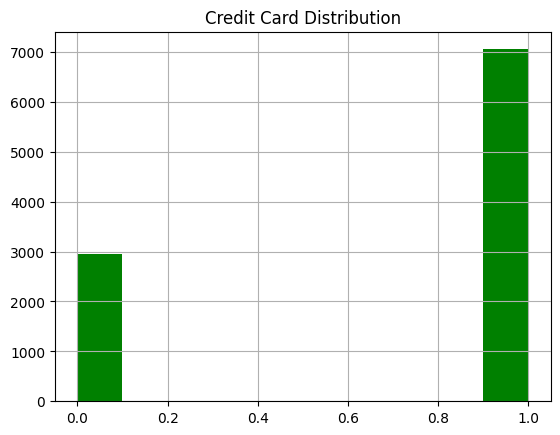

In [ ]:
dta_train["HasCrCard"].hist(color="green")
plt.title('Credit Card Distribution')
plt.show()

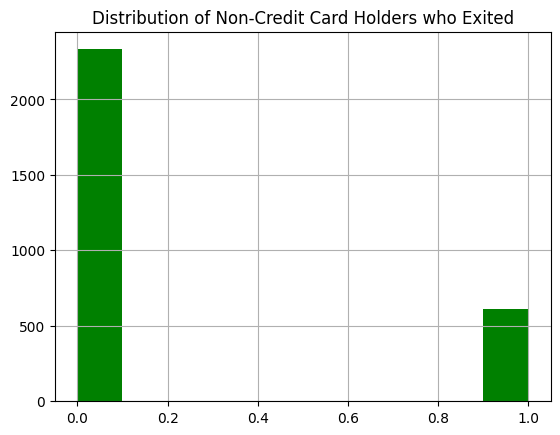

In [ ]:
dta_train["Exited"][dta_train["HasCrCard"]==0].hist(color="green")
plt.title('Distribution of Non-Credit Card Holders who Exited')
plt.show()

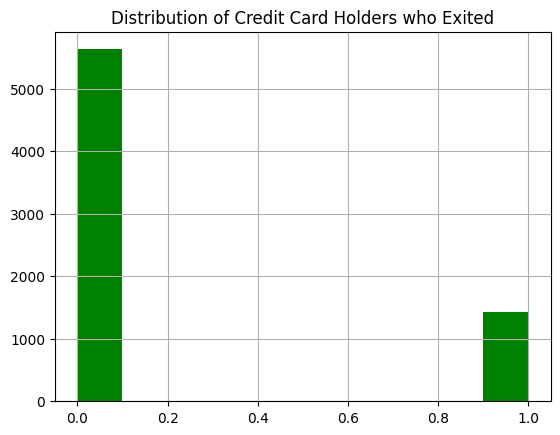

In [ ]:
dta_train["Exited"][dta_train["HasCrCard"]==1].hist(color="green")
plt.title('Distribution of Credit Card Holders who Exited')
plt.show()

**Credit Card Holders**: A larger number of customers with credit cards did not exit compared to those who exited, suggesting that having a credit card does not necessarily lead to higher churn. However, the absolute number of exits among credit card holders is considerable.

**Non-Credit Card Holders**: Similarly, the majority of customers without a credit card also did not exit. The proportion of exits to non-exits is significantly lower in this group compared to those with a credit card.


Both groups have a similar churn rate of around 20%, suggesting that the **presence of a credit card has a minimal impact on the likelihood of exiting**.

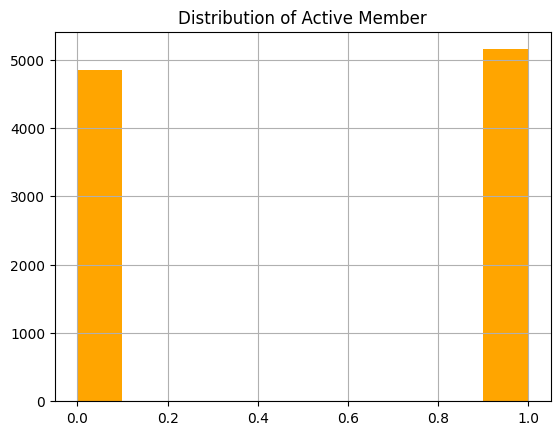

In [ ]:
dta_train["IsActiveMember"].hist(color="orange")
plt.title('Distribution of Active Member')
plt.show()

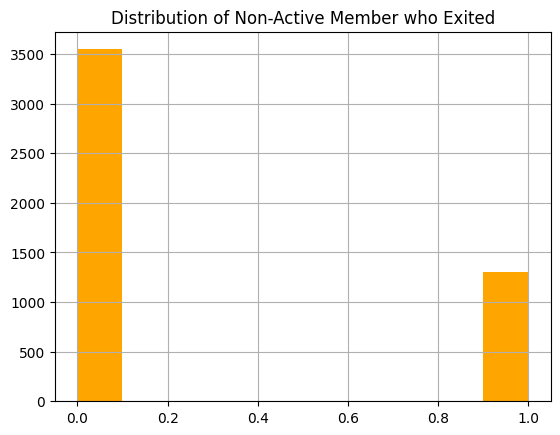

In [ ]:
dta_train["Exited"][dta_train["IsActiveMember"]==0].hist(color="orange")
plt.title('Distribution of Non-Active Member who Exited')
plt.show()

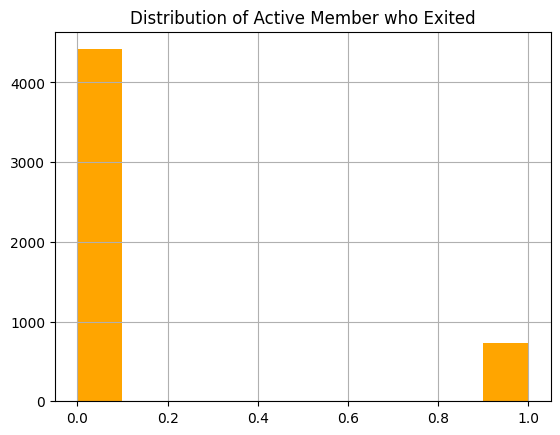

In [ ]:
dta_train["Exited"][dta_train["IsActiveMember"]==1].hist(color="orange")
plt.title('Distribution of Active Member who Exited')
plt.show()

**Active Members**: A significant majority of active members did not exit, indicating that active engagement with the service or product correlates with higher retention.

**Non-Active Members:** There are more non-active members who exited compared to active members who exited. Also, the ratio of non-active members who exited to those who did not is higher than that of active members, indicating a higher churn rate among non-active members.

> Active members have a significantly lower churn rate of about 14.3%, indicating better retention.

> Non-active members show a higher churn rate of nearly 27%, which is almost double that of active members.


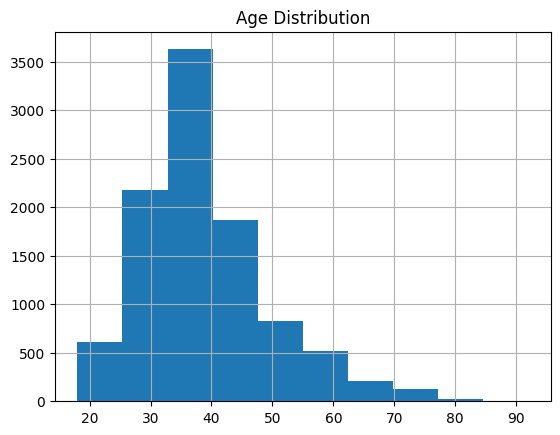

In [ ]:
dta_train["Age"].hist()
plt.title('Age Distribution')
plt.show()

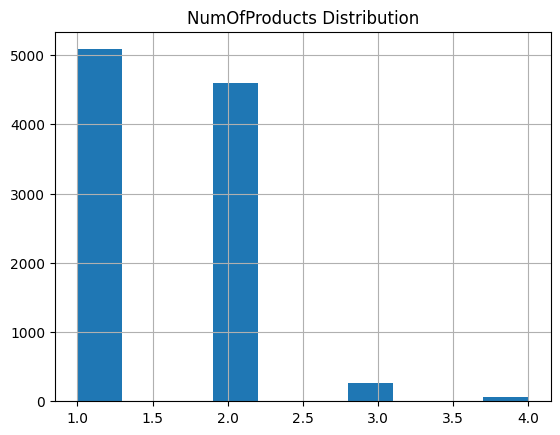

In [ ]:
dta_train["NumOfProducts"].hist()
plt.title('NumOfProducts Distribution')
plt.show()

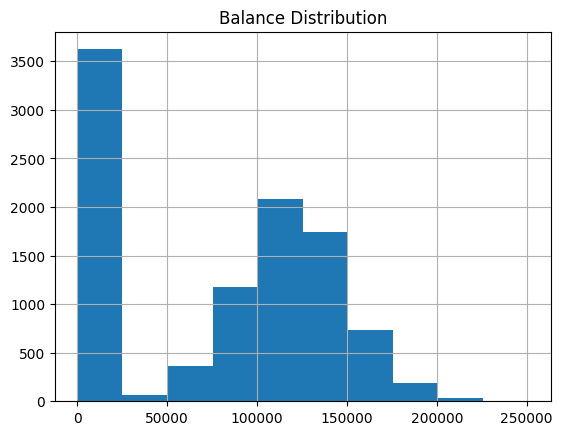

In [ ]:
dta_train["Balance"].hist()
plt.title('Balance Distribution')
plt.show()

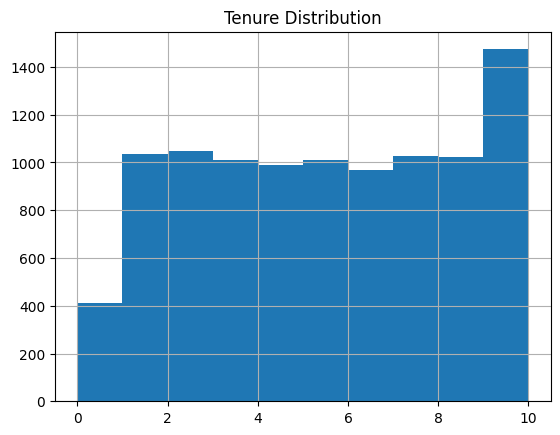

In [ ]:
dta_train["Tenure"].hist()
plt.title('Tenure Distribution')
plt.show()

In [ ]:
dta_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
numerical_cols = dta_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
numerical_cols= numerical_cols[2:]
numerical_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
correlation_matrix = dta_train[numerical_cols].corr()
correlation_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


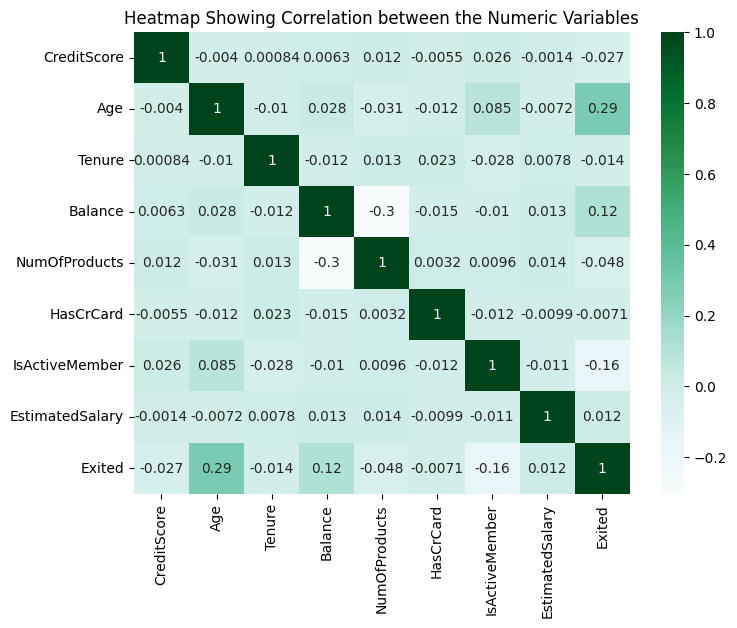

In [ ]:
#correlations between numerical varables
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='BuGn', annot=True)
plt.title('Heatmap Showing Correlation between the Numeric Variables')
plt.show()

> **Age** (0.29): Age has a positive correlation of 0.29 with the "Exited" status. This is the highest correlation observed, suggesting that older customers are more likely to exit.

> **IsActiveMember** (-0.16): Being an active member shows a negative correlation of -0.16 with exiting. This indicates that active members are less likely to exit.

> **Balance** (0.12): The account balance has a positive correlation of 0.12 with exiting. This suggests that customers with higher balances are somewhat more likely to exit, although this correlation is moderate.

> **NumOfProducts** (-0.048): The number of products held by a customer shows a negative correlation of -0.048 with exiting. This indicates that customers with more products are slightly less likely to exit.

The remaining variables (CreditScore, Tenure, and EstimatedSalary) show very low correlation values with "Exited", implying they are less useful in predicting whether a customer exits.

From these observations, to predict customer churn ("Exited"), focusing on Age, IsActiveMember, and Balance would be most effective. These variables show the most substantial correlations and are likely to be the best predictors based on this matrix.

##Data Preprocessing & Feature Engineering

Checking dataset for null columns

In [ ]:
dta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dropping unnecessary columns for our dataset

In [ ]:
dta_train=dta_train.drop('RowNumber', axis=1)
dta_train=dta_train.drop('CustomerId', axis=1)
dta_train=dta_train.drop('Surname', axis=1)

Checking if columns were successfully dropped

In [ ]:
dta_train.head(0)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Encoding label columns

In [ ]:
encoder = LabelEncoder()

In [ ]:
dta_train['Geography'] = encoder.fit_transform(dta_train['Geography'])
print(dta_train['Geography'])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64


In [ ]:
dta_train['Gender'] = encoder.fit_transform(dta_train['Gender'])
print(dta_train['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


Synthetically generating more ("Exited"=1,"HasCrCard"=0) samples to balance the dataset

In [ ]:
has_cr_card_0 = dta_train[dta_train['HasCrCard'] == 0]
has_cr_card_1 = dta_train[dta_train['HasCrCard'] == 1]

count_diff = len(has_cr_card_1) - len(has_cr_card_0)

new_rows = has_cr_card_0.sample(n=count_diff, replace=True)

df_balanced = pd.concat([dta_train, new_rows])

In [ ]:
df_balanced.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

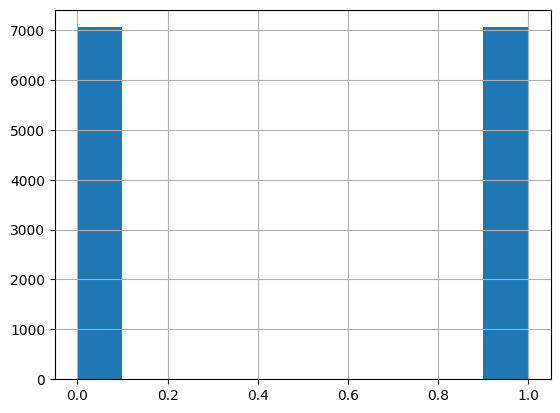

In [ ]:
df_balanced['HasCrCard'].hist()

<Axes: >

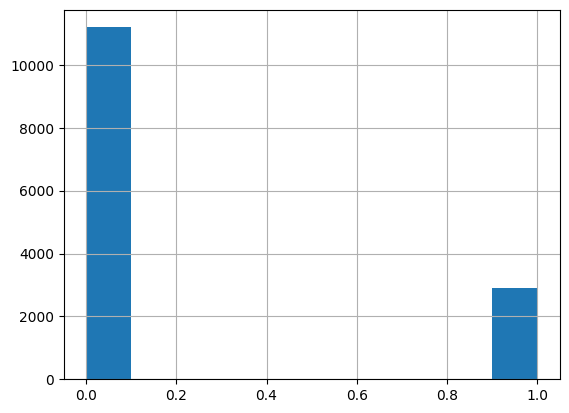

In [ ]:
df_balanced['Exited'].hist()

In [ ]:
exited_0 = df_balanced[df_balanced['Exited'] == 0]
exited_1 = df_balanced[df_balanced['Exited'] == 1]

count_diff_exited = len(exited_0) - len(exited_1)

new_rows_exited = exited_1.sample(n=count_diff_exited, replace=True)

df_balanced_final = pd.concat([df_balanced, new_rows_exited])

In [ ]:
df_balanced_final.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

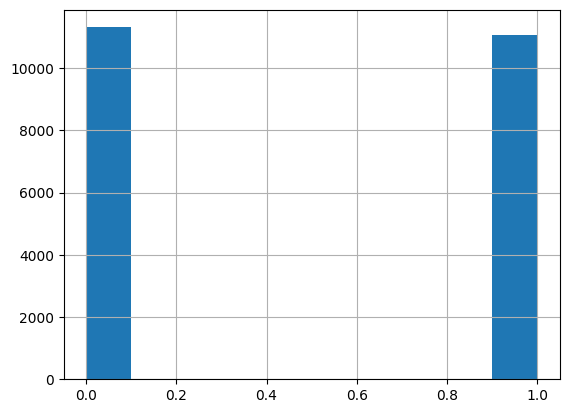

In [ ]:
df_balanced_final['HasCrCard'].hist()

<Axes: >

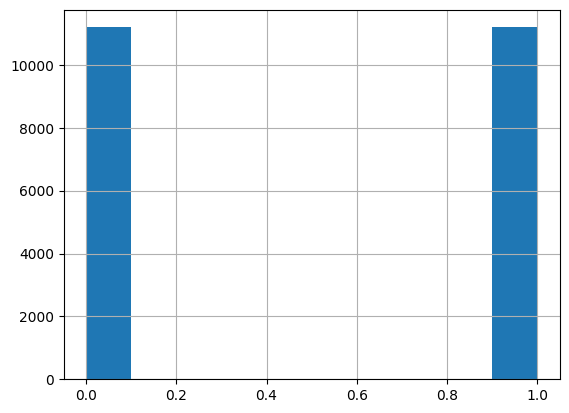

In [ ]:
df_balanced_final['Exited'].hist()

In [ ]:
df_balanced_final.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_balanced_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22396 entries, 0 to 7737
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      22396 non-null  int64  
 1   Geography        22396 non-null  int64  
 2   Gender           22396 non-null  int64  
 3   Age              22396 non-null  int64  
 4   Tenure           22396 non-null  int64  
 5   Balance          22396 non-null  float64
 6   NumOfProducts    22396 non-null  int64  
 7   HasCrCard        22396 non-null  int64  
 8   IsActiveMember   22396 non-null  int64  
 9   EstimatedSalary  22396 non-null  float64
 10  Exited           22396 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.1 MB


Removing Outliers

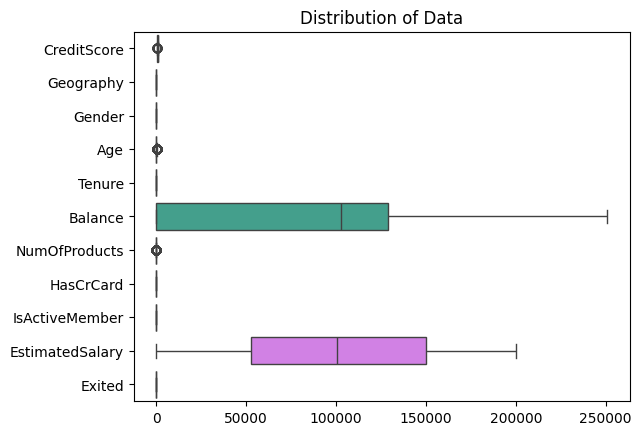

In [ ]:
sns.boxplot(data=df_balanced_final, orient='h')
plt.title('Distribution of Data')
plt.show()

In [ ]:
from scipy import stats
df= df_balanced_final[(np.abs(stats.zscore(df_balanced_final)) < 3).all(axis=1)]  # Remove rows with outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21919 entries, 0 to 7737
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      21919 non-null  int64  
 1   Geography        21919 non-null  int64  
 2   Gender           21919 non-null  int64  
 3   Age              21919 non-null  int64  
 4   Tenure           21919 non-null  int64  
 5   Balance          21919 non-null  float64
 6   NumOfProducts    21919 non-null  int64  
 7   HasCrCard        21919 non-null  int64  
 8   IsActiveMember   21919 non-null  int64  
 9   EstimatedSalary  21919 non-null  float64
 10  Exited           21919 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.0 MB


Exited will be our target column so we remove it from our dataframe

In [ ]:
total_rows = len(df)

start_index = total_rows // 3
end_index = start_index * 2

third_of_df = df.iloc[start_index:end_index]
df = df.iloc[:start_index]

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
7402,647,2,1,33,7,121260.19,2,1,0,77216.48,0
7403,796,2,1,56,6,94231.13,1,0,0,121164.60,1
7404,733,0,1,39,1,0.00,2,1,1,141841.31,0
7405,556,0,1,34,8,163757.06,1,1,1,104000.06,0


In [ ]:
third_of_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7407,639,0,1,22,4,0.00,2,1,0,28188.96,0
7408,715,0,1,35,2,141005.47,1,1,1,60407.93,0
7409,807,1,0,42,9,105356.09,2,1,1,130489.37,0
7410,714,2,1,34,5,0.00,2,1,0,193040.32,0
7411,626,1,0,23,6,85897.95,1,1,0,109742.80,0
...,...,...,...,...,...,...,...,...,...,...,...
7580,708,0,1,34,3,0.00,1,0,1,121457.88,1
585,760,0,0,51,2,100946.71,1,0,0,179614.80,1
942,376,0,0,46,6,0.00,1,1,0,157333.69,1
3035,817,1,1,45,9,101207.75,1,0,0,88211.12,1


In [ ]:
y = df['Exited']

In [ ]:
df = df.drop(columns=['Exited'])

In [ ]:
y = y.values

In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
y.shape

(21921,)

In [ ]:
X = df.values

In [ ]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [6.2200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 7.2155850e+04],
       [7.5700000e+02, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 7.1926280e+04],
       [6.4700000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.9080636e+05]])

In [ ]:
X.shape

(7306, 10)

Select the best features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=6)

# Fit and transform the data to select the top 10 features
X_new = selector.fit_transform(X, y)
X_new

array([[0.0000000e+00, 0.0000000e+00, 4.2000000e+01, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.0000000e+00, 0.0000000e+00, 4.1000000e+01, 8.3807860e+04,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 4.2000000e+01, 1.5966080e+05,
        3.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 3.9000000e+01, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 3.4000000e+01, 1.6375706e+05,
        1.0000000e+00, 1.0000000e+00],
       [2.0000000e+00, 1.0000000e+00, 5.8000000e+01, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+00]])

In [ ]:
X_new.shape

(22009, 6)

In [ ]:
mask = selector.get_support()
# Get the names of the selected features
selected_features = [feature for feature, selected in zip(df.columns, mask) if selected]
print("Selected features:", selected_features)


Selected features: ['Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']


## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val= train_test_split(X_new,y,test_size=0.2,random_state=42)


## Model Selection

SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd=  SGDClassifier()
sgd.fit(x_train,y_train)

SGDClassifier()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Support Vector Machine

In [ ]:
from sklearn import svm

svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

K-Neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

MultiLayer Perceptron (Neural Network)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

##Model Evaluation

In [ ]:
models = [sgd,lr,rfc,svm,knc,gbc,dtc,mlp]
model_names = ['SGD Classifier','Logistic Regression','Random Forest Classifier','Support Vector Machine',
               'KNeighbours Classifier','Gradient Boosting Classifier','Decision Trees Classifier','Multilayer Perceptron']

for name,model in enumerate(models):
  y_pred = model.predict(x_val)
  print("Model:",model_names[name])
  print("Accuracy:", accuracy_score(y_val, y_pred))
  print("Precision:", precision_score(y_val, y_pred, average='macro'))
  print("Recall:", recall_score(y_val, y_pred, average='macro'))
  print("F1 Score:", f1_score(y_val, y_pred, average='macro'))
  print("\n")


Model: SGD Classifier
Accuracy: 0.4521203830369357
Precision: 0.5721986659082683
Recall: 0.5998971515449627
F1 Score: 0.4435922179254549


Model: Logistic Regression
Accuracy: 0.8050615595075239
Precision: 0.40253077975376195
Recall: 0.5
F1 Score: 0.4460022735884805


Model: Random Forest Classifier
Accuracy: 0.8440492476060192
Precision: 0.7553864138951925
Recall: 0.7103549016977448
F1 Score: 0.7284051207175262




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Support Vector Machine
Accuracy: 0.8050615595075239
Precision: 0.40253077975376195
Recall: 0.5
F1 Score: 0.4460022735884805


Model: KNeighbours Classifier
Accuracy: 0.7735978112175103
Precision: 0.5749434389140271
Recall: 0.5402897643428878
F1 Score: 0.5407677058313871


Model: Gradient Boosting Classifier
Accuracy: 0.8741450068399452
Precision: 0.8414036436524389
Recall: 0.7223986048383491
F1 Score: 0.7601098646310795


Model: Decision Trees Classifier
Accuracy: 0.8283173734610123
Precision: 0.7268359420972108
Recall: 0.7298349953047445
F1 Score: 0.7283121402261832


Model: Multilayer Perceptron
Accuracy: 0.8119015047879617
Precision: 0.8343034727703236
Recall: 0.5202030139068998
F1 Score: 0.48775282688326166




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Perfoming Grid Search on Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

optimized_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
optimized_rfc.fit(x_train, y_train)

print("Best parameters found:", optimized_rfc.best_params_)
print("Best cross-validation score achieved:", optimized_rfc.best_score_)

y_pred = optimized_rfc.best_estimator_.predict(x_val)

# Evaluate the predictions
print("Optimized Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='macro'))
print("Recall:", recall_score(y_val, y_pred, average='macro'))
print("F1 Score:", f1_score(y_val, y_pred, average='macro'))
print("\n")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}
Best cross-validation score achieved: 0.8605398303197909
Optimized Random Forest Classifier:
Accuracy: 0.8638850889192886
Precision: 0.8101620731495927
Recall: 0.7133673180402152
F1 Score: 0.7455579022856568




Performing Grid Search on Stochastic Gradient Descent

In [ ]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'alpha': [0.0001,0.1,0.01,0.001],
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge',
             'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    }

optimized_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
optimized_sgd.fit(x_train, y_train)

print("Best parameters found:", optimized_sgd.best_params_)
print("Best cross-validation score achieved:", optimized_sgd.best_score_)

y_pred = optimized_sgd.best_estimator_.predict(x_val)

# Evaluate the predictions
print("Optimized Stochastic Gradient Descent:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='macro'))
print("Recall:", recall_score(y_val, y_pred, average='macro'))
print("F1 Score:", f1_score(y_val, y_pred, average='macro'))
print("\n")

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'alpha': 0.1, 'loss': 'hinge', 'penalty': None}
Best cross-validation score achieved: 0.7956875388166915
Optimized Stochastic Gradient Descent:
Accuracy: 0.45348837209302323
Precision: 0.5878205128205128
Recall: 0.6180312718925607
F1 Score: 0.4471124742343673




Performing Grid Search on Decision Tree Classifier

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None]
}

optimized_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
optimized_dtc.fit(x_train, y_train)

print("Best parameters found:", optimized_dtc.best_params_)
print("Best cross-validation score achieved:", optimized_dtc.best_score_)

y_pred = optimized_dtc.best_estimator_.predict(x_val)

# Evaluate the predictions
print("Optimized Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='macro'))
print("Recall:", recall_score(y_val, y_pred, average='macro'))
print("F1 Score:", f1_score(y_val, y_pred, average='macro'))
print("\n")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'criterion': 'log_loss', 'max_features': None, 'splitter': 'best'}
Best cross-validation score achieved: 0.8116050189249681
Optimized Decision Tree Classifier:
Accuracy: 0.8248974008207934
Precision: 0.7203400474841082
Recall: 0.7144151798357405
F1 Score: 0.7172830553541214




## Predictive Analysis


In [ ]:
third_of_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7407,639,0,1,22,4,0.00,2,1,0,28188.96,0
7408,715,0,1,35,2,141005.47,1,1,1,60407.93,0
7409,807,1,0,42,9,105356.09,2,1,1,130489.37,0
7410,714,2,1,34,5,0.00,2,1,0,193040.32,0
7411,626,1,0,23,6,85897.95,1,1,0,109742.80,0


In [ ]:
third_of_df['Gender'] = encoder.fit_transform(third_of_df['Gender'])
print(third_of_df['Gender'])

7407    1
7408    1
7409    0
7410    1
7411    0
       ..
7580    1
585     0
942     0
3035    1
2518    0
Name: Gender, Length: 7306, dtype: int64


In [ ]:
third_of_df['Geography'] = encoder.fit_transform(third_of_df['Geography'])
print(third_of_df['Geography'])

7407    0
7408    0
7409    1
7410    2
7411    1
       ..
7580    0
585     0
942     0
3035    1
2518    0
Name: Geography, Length: 7306, dtype: int64


In [ ]:
x_test = third_of_df[['Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']].values

In [ ]:
y_actual = third_of_df['Exited']
y_actual

7407    0
7408    0
7409    0
7410    0
7411    0
       ..
7580    1
585     1
942     1
3035    1
2518    1
Name: Exited, Length: 7306, dtype: int64

Stochastic Gradient Descent Prediction

In [ ]:
y_pred = sgd.predict(x_test)
print("SGD Model Performance:")
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("Precision:", precision_score(y_actual, y_pred, average='macro'))
print("Recall:", recall_score(y_actual, y_pred, average='macro'))
print("F1 Score:", f1_score(y_actual, y_pred, average='macro'))

SGD Model Performance:
Accuracy: 0.4953462907199562
Precision: 0.6025416974917878
Recall: 0.6063091397120625
F1 Score: 0.4951937545541958


Optimized Stochastic Gradient Descent Prediction

In [ ]:
y_pred = optimized_sgd.predict(x_test)
print("Optimized SGD Model Performance:")
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("Precision:", precision_score(y_actual, y_pred, average='macro'))
print("Recall:", recall_score(y_actual, y_pred, average='macro'))
print("F1 Score:", f1_score(y_actual, y_pred, average='macro'))

Optimized SGD Model Performance:
Accuracy: 0.501231864221188
Precision: 0.6220683123253106
Recall: 0.6224347577036814
F1 Score: 0.5012309298053774


Random Forest Classifier Prediction

In [ ]:
y_pred = rfc.predict(x_test)
print("RFC Model Performance:")
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("Precision:", precision_score(y_actual, y_pred, average='macro'))
print("Recall:", recall_score(y_actual, y_pred, average='macro'))
print("F1 Score:", f1_score(y_actual, y_pred, average='macro'))

RFC Model Performance:
Accuracy: 0.8795510539282781
Precision: 0.8693725703880615
Recall: 0.8210349006466346
F1 Score: 0.8403584951554428


Decision Tree Classifier Prediction

In [ ]:
y_pred = dtc.predict(x_test)
print("DTC Model Performance:")
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("Precision:", precision_score(y_actual, y_pred, average='macro'))
print("Recall:", recall_score(y_actual, y_pred, average='macro'))
print("F1 Score:", f1_score(y_actual, y_pred, average='macro'))

DTC Model Performance:
Accuracy: 0.8617574596222283
Precision: 0.8354537174073726
Recall: 0.8112581877513113
F1 Score: 0.821906805329961


Gradient Boosting Classifier Prediction

In [ ]:
y_pred = gbc.predict(x_test)
print("GBC Model Performance:")
print("Accuracy:", accuracy_score(y_actual, y_pred))
print("Precision:", precision_score(y_actual, y_pred, average='macro'))
print("Recall:", recall_score(y_actual, y_pred, average='macro'))
print("F1 Score:", f1_score(y_actual, y_pred, average='macro'))

GBC Model Performance:
Accuracy: 0.8260333972077745
Precision: 0.8343561511987401
Recall: 0.7136175384351352
F1 Score: 0.7423944089542709
